<font color='Sucees'> 
### <u>REVIEWER INTRO</u>
<br />
Hi, Raymond 🖐 My name is Andrey Kulikov and I am glad to be your reviewer in this project.<br />
    
You can find my comments under the heading **"<u>REVIEWER COMMENT</u>"** marked with color depending on the completeness:<br/>
<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully.
</div>
<div class="alert alert-block alert-warning">
<b>Remarks:</b> if there is an area for improvement an I could give some recommendations. Yellow comment is not a hurdle to accept the work.
</div>
<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

Please pay attention to not move or change my comments. It would be good to highlight your answers in some way. 
<div class="alert alert-info"> <b>Student comment:</b> For example like this.</div>
    
    
At the end of the notebook I put a colored reviewer summary block under the heading **"<u>REVIEWER SUMMARY</u>"** where give overall conclusion about your project.
    
OK, now let's go.
</font>

# Forecasts and Predictions

Model Fitness has provided a data set of their customer profiles in order to analyze them and come up with a customer retention strategy. The main goal of this project is to find the churn rates for the groups and come up with a reason as to why. Afterwards, come up with recommendations as to improve customer service by indentifying c

<font color='Grenn'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Short brief, not so bad.
</div>
<div class="alert alert-block alert-warning">
It is an industrial standard and just a good style to make the project well introduced. The notebook should look like a report, self introduced, giving full scope of information about project tasks, action plan, conclusions, being well structured, well commented and well visualized. It should be self selling and selling yourself as a cool specialist.<br/>
Please reference hear for more useful tips about how to make your project presentation brilliant: <a href="https://www.notion.so/Project-Presentation-6a8a6e28090b499b9037c48a96ae37c7">Project Presentation</a>
</div>
</font>

# Step 1. Download the data

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans


In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


<font color='Grenn'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Data is loaded and preliminarily observed. Good.
</div>
</font>

# Step 2. Carry out exploratory data analysis (EDA)

### Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).

In [5]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


The data doesn't appear to be missing any features at a glance. 
Analyzing the mean values for the various binary dataset fields indicate that if the value is above 0.5, then it's leaning more to true. For the other dataset fields, the mean varies in how close it is to the min and max values.

The standard deviation looks fine for most of the datasets with an exception to 'Lifetime' since that dataset has a large max value.

### Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

In [6]:
mean_ft_val = gym.groupby('Churn').mean()
mean_ft_val

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Comparing the data between the two groups, the ones that stayed are closer to the Near_location, are partners, have a longer contract period, more likely to take part in group visits, slightly older in age, higher avg_additional_charges_total, higher month_to_end_contract, higher lifetime, higher avg_frequency_total and higher avg_class_frequency_current_month.

### Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

In [7]:
#Query of data for users that stayed and left
stayed = gym.query('Churn==0')
left = gym.query('Churn==1')

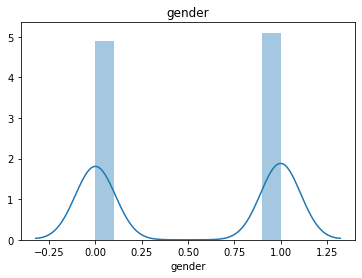

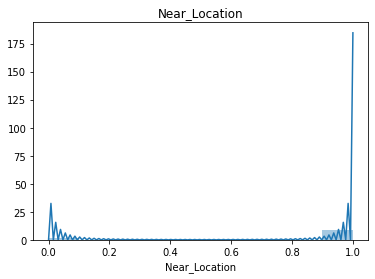

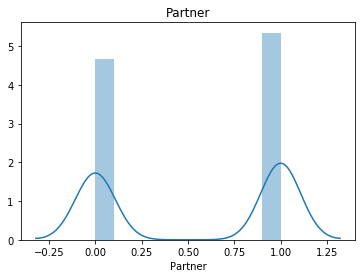

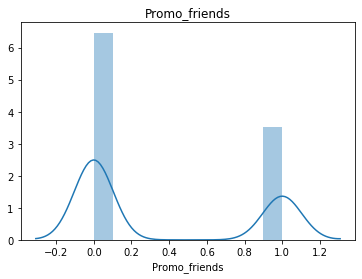

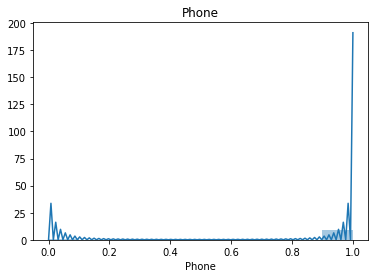

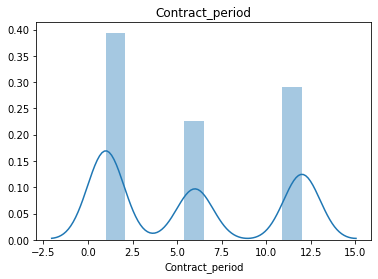

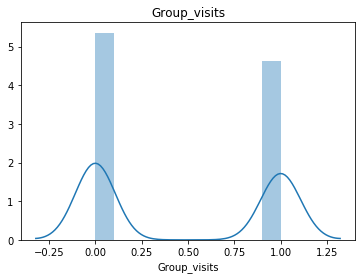

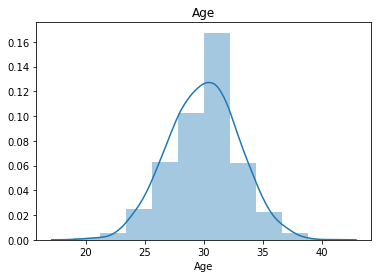

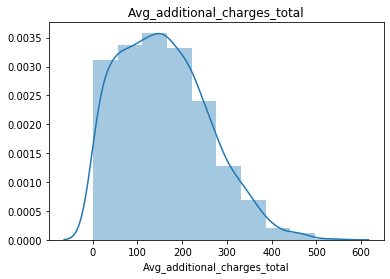

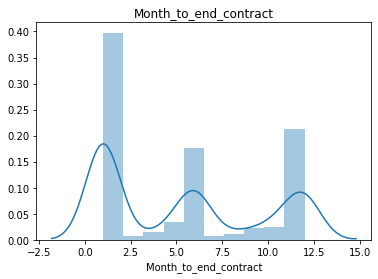

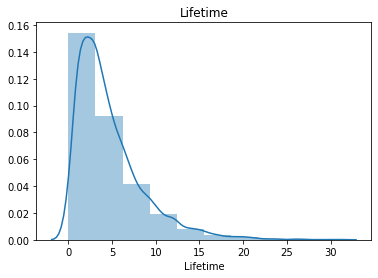

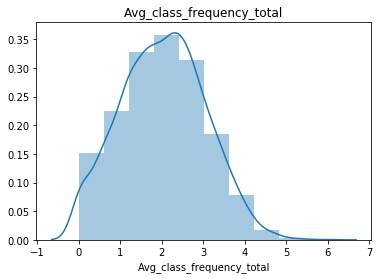

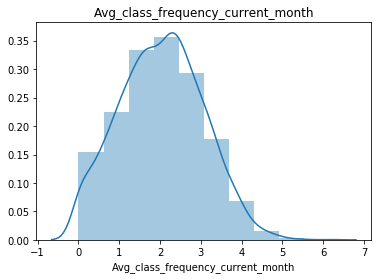

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


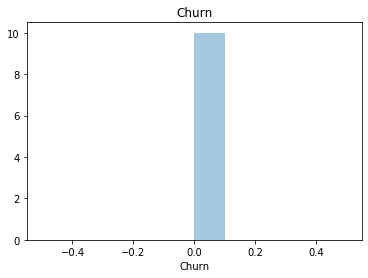

In [8]:

#Bar histograms and distributions for those who stayed
for feature in stayed.columns:
    sns.distplot(stayed[feature], bins = 10)
    plt.title(feature)
    plt.show();

<font color='Red'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-danger">
<del>Ups 😟😟😟 The cell ☝ is not working. Please fix it.<br/>
I fixed it temporarily to be able to move on with the review and removed my code after that. Of course there is a risk that I could misunderstand your idea. <br/>
    
Another one point - please pay attention to set names for all graph axes in the report. It is the must for the good presented project. Please name y axes here and check all graphs in the notebook for titles and both axes names.
</div>
</font>

<font color='Grenn'> 
### <u>V1 REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Fixed, good 👍👍👍
</div>
</font>

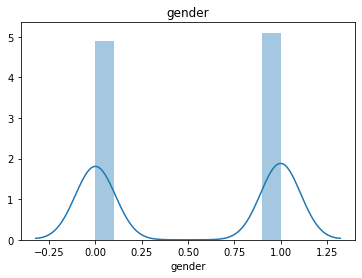

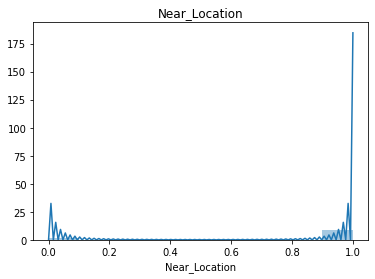

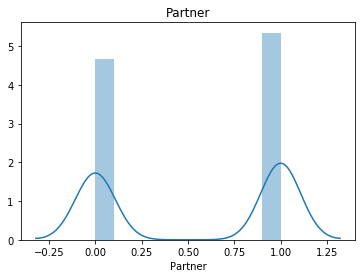

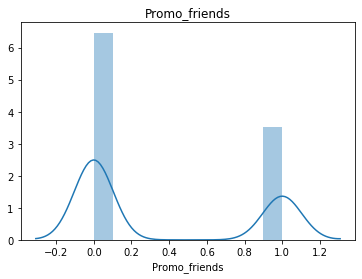

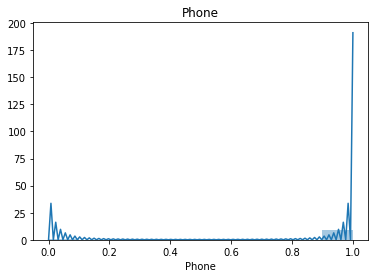

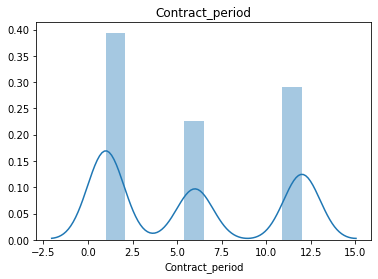

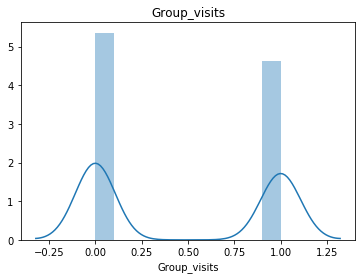

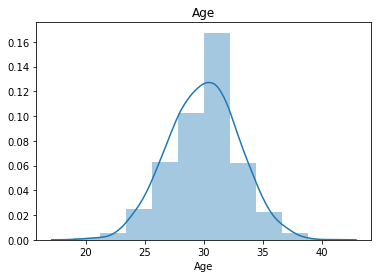

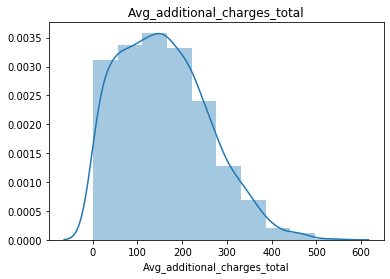

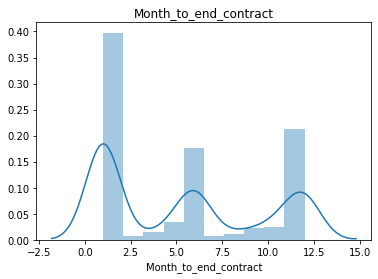

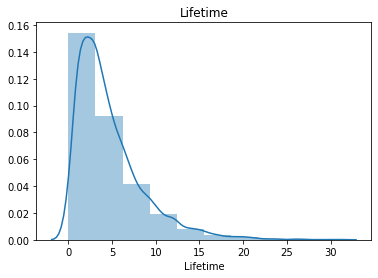

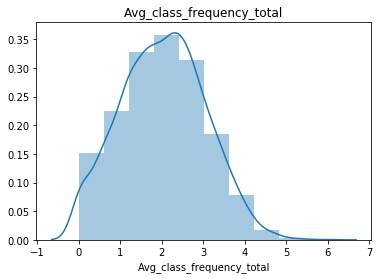

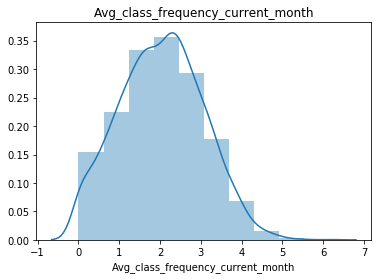

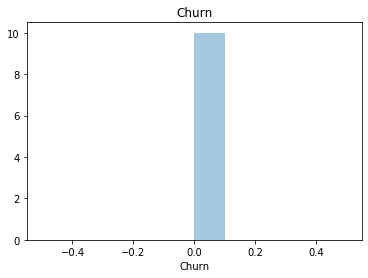

In [9]:
#Bar histograms and distributions for those who left (churned)
for feature in left.columns:
    sns.distplot(stayed[feature], bins = 10)
    plt.title(feature)
    plt.show();

<font color='Red'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-danger">
<del>All the same like above ☝ 
</div>
</font>

<font color='Grenn'> 
### <u>V1 REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Ok, agreed.
</div>
</font>

### Build a correlation matrix and display it.

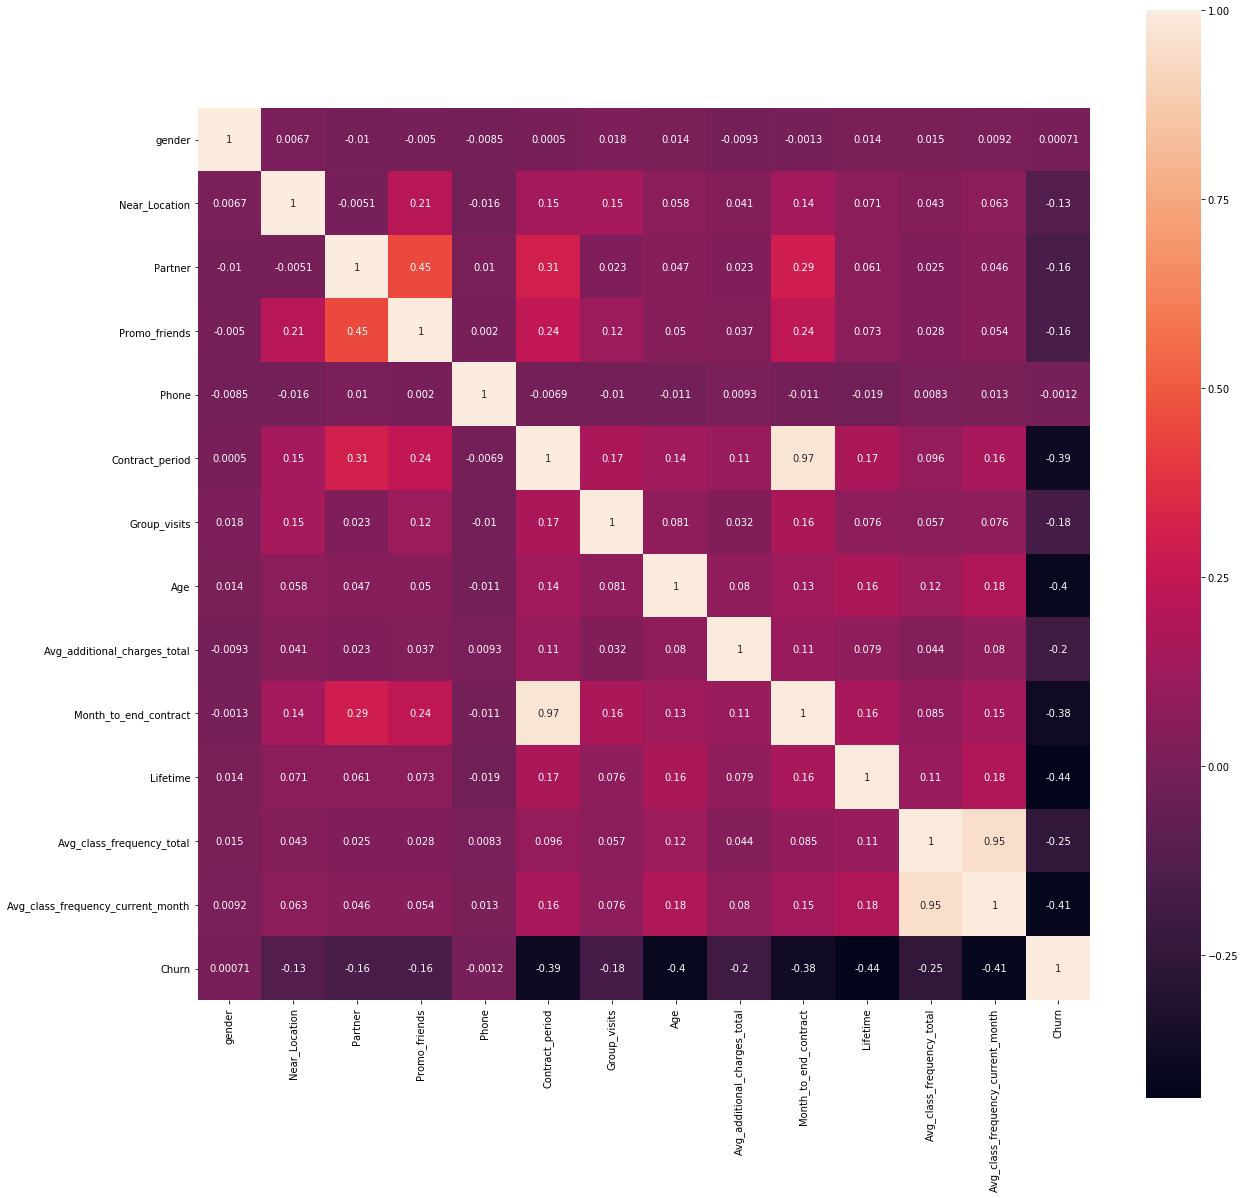

In [10]:
#Correlation matrix of the gym data set
corr_m = gym.corr()

# plot a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_m, square = True, annot = True);

From the correlation matrix, there aren't many features that are related to one another, but month-to-end-contract and contract-period have the strongest relation to one another. Further analyis on that correlation pair should be done to see if it is the answer to the churn rate.

<font color='Red'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
A good interesting idea to plot correlation matrix in form of a colored heatmap. It looks really cool.
</div>
<div class="alert alert-block alert-warning">
    
The heatmap looks too small. Try to call `plt.figure(figsize=(20,20))` before plotting the map.
</div>
<div class="alert alert-block alert-danger">
<del>We have plotted really presentable map but it is not enough for a professionsl. Please give your findings, ideas and conclusions about it. And don't forget to set a title for the plotting. It might be unclear at a glance what is its message.
</div>
</font>

<font color='Grenn'> 
### <u>V1 REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Well done.
</div>
</font>

# Step 3. Build a model to predict user churn

*Build a binary classification model for customers where the target feature is the user's leaving next month.*

*Remember to indicate the random_state parameter when dividing data and defining the algorithm.*

### Divide the data into train and validation sets using the train_test_split() function.

In [11]:
# divide the data into features (the X matrix) and a target variable (y)
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train StandardScaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)

# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

<font color='Grenn'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Well done 👍👍👍 splitting on target and features and on train and test samples.
</div>
</font>

### Train the model on the train set with two methods:

#### logistic regression


In [12]:
# define the model's algorithm 
model1 = LogisticRegression(random_state=0)

# train your model
model1.fit(X_train, y_train)

# use the trained model to make a forecast
predictions1 = model1.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### random forest

In [13]:
# define the model's algorithm
model2 = RandomForestClassifier(n_estimators = 100, random_state=0)

# train the model
model2.fit(X_train, y_train)

# use the trained model to make forecasts
predictions2 = model2.predict(X_test) 

<font color='Grenn'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
In common models trained correctly.
</div>
<div class="alert alert-block alert-danger">
<del>    
Please pay attention to give the models same parameter `random_state` value. Fitting itself a model selects rows from the training set randomly. However they are quasi random sequences. If to give same `random_state` for both models they will select same subsamples. Giving different `random_states` we would get models trained on different subsamples. In this way the models might be trained slightly different and we are not allowed to compare them.<br/>
Please retrain and retest Logistic Regression with same `random_state` value as for Random Forest.
</div>
</font>

<font color='Grenn'> 
### <u>V1 REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Ok, agreed.
</div>
</font>

### Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

In [14]:
#Logistic Regression model
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions1)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions1)))
print('Recall: {:.2f}'.format((recall_score(y_test, predictions1))))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83


In [15]:
#Random Forest Model
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions2)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions2)))
print('Recall: {:.2f}'.format((recall_score(y_test, predictions2))))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82


After evaluating both models for accuracy, precision and recall, the Logistic Regression model gave better results for all three. The Logistic Model provides a slightly better model for the validation data.

<font color='Orange'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-warning">
Let's see your conclusions again after you retrained and retested Logistic Regression. Will they change or not.
</div>
</font>

# Step 4. Create user clusters

*Set aside the column with data on churn and identify object (user) clusters:*

### Standardize the data.

In [16]:
# obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
x_sc = sc.fit_transform(X)


### Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.

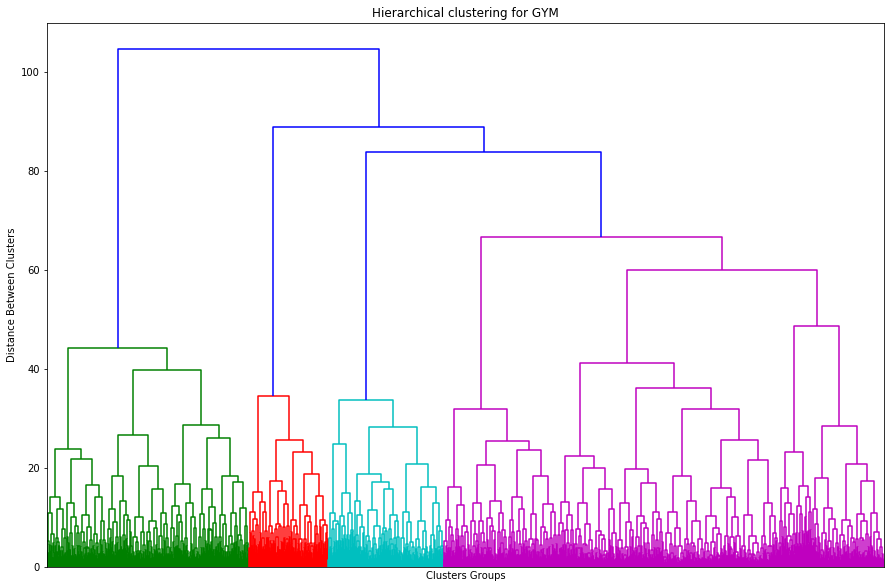

In [17]:
linked = linkage(x_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, 
           orientation='top', 
           labels = gym.index,
           no_labels=True
           )
plt.title('Hierarchical clustering for GYM')
plt.xlabel('Clusters Groups')
plt.ylabel('Distance Between Clusters')
plt.show();

The dendrogram clustering suggests that 4 would be the optimal amount.

<font color='Red'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Well done dendrogram. However somebody might see 3 or 2 clusters, final decision is up to you. You are the analyst, it is your right, your decision and your responsibility.
</div>
<div class="alert alert-block alert-danger">
<del>Please set a name for both axes and make x one more clear with labels.
</div>
</font>

<div class="alert alert-info"> <b>How should I add labels to the x-axis? I'm not sure how I should do that without it being too cluttered and unreadable.</div>


<font color='Red'> 
### <u>V1 REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-danger">
<del>    
Let's have a look at scipy manual, parameters of `dendrogram` function description:<br/>
    
"
<b>labels</b>: ndarray, optional.
By default, labels is None so the index of the original observation is used to label the leaf nodes. Otherwise, this is an -sized sequence, with n == Z.shape[0] + 1. The labels[i] value is the text to put under the  th leaf node only if it corresponds to an original observation and not a non-singleton cluster.<br/>
    
<b>no_labels</b>: bool, optional. When True, no labels appear next to the leaf nodes in the rendering of the dendrogram."
    
By default they are `None` and `False` accordingly which makes x axis ticklabels very noisy. Please use this parameters to tune the dendrogram.
    
You can find more info here: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html">scipy.cluster.hierarchy.dendrogram</a>
</div>
</font>

<font color='grenn'> 
### <u>V2 REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Looks much better 👍👍👍
</div>
</font>

### Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)

In [18]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5)
# predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
labels = km.fit_predict(x_sc)
# store cluster labels in the field of our dataset
gym['cluster_km'] = labels

### Look at the mean feature values for clusters. Does anything catch your eye?

In [19]:
# print the statistics of the mean feature values per cluster
print(gym.mean())

gender                                 0.510250
Near_Location                          0.845250
Partner                                0.486750
Promo_friends                          0.308500
Phone                                  0.903500
Contract_period                        4.681250
Group_visits                           0.412250
Age                                   29.184250
Avg_additional_charges_total         146.943728
Month_to_end_contract                  4.322750
Lifetime                               3.724750
Avg_class_frequency_total              1.879020
Avg_class_frequency_current_month      1.767052
Churn                                  0.265250
cluster_km                             1.846750
dtype: float64


In [20]:
gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,2
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1,3
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0,0


### Plot distributions of features for the clusters. Do you notice anything?

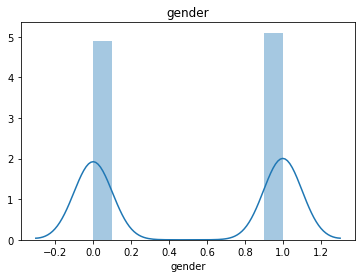

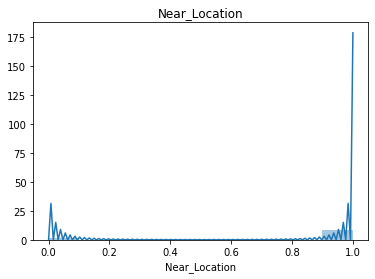

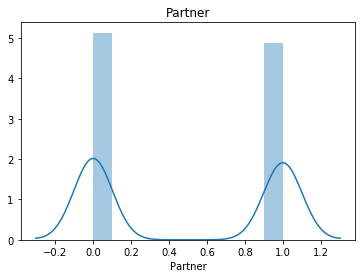

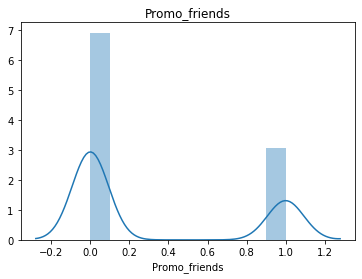

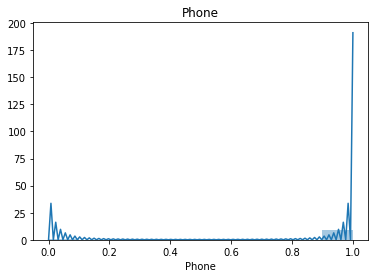

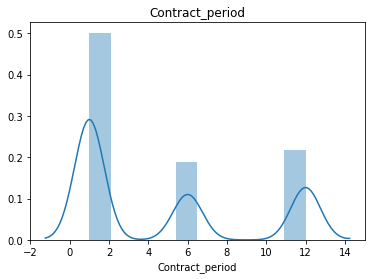

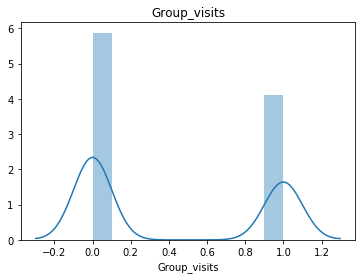

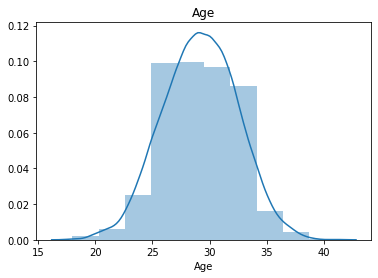

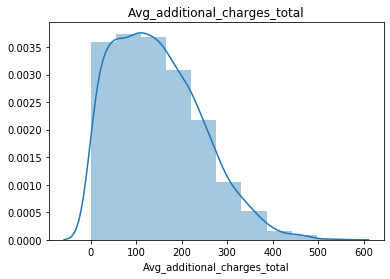

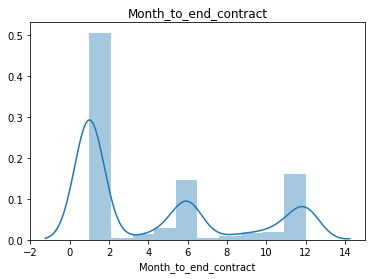

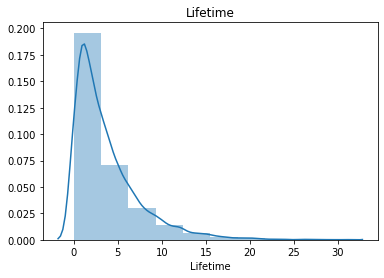

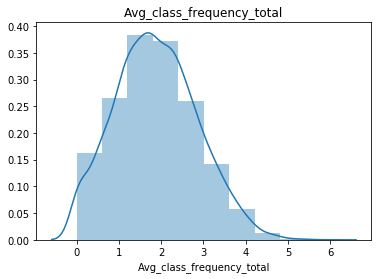

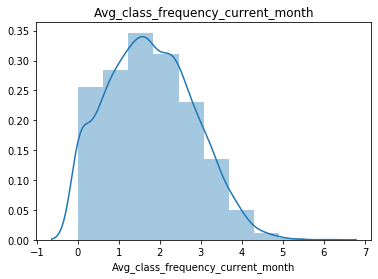

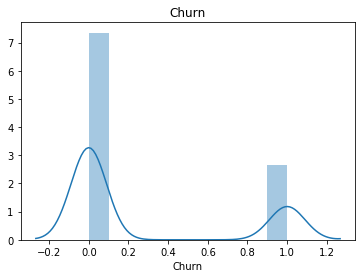

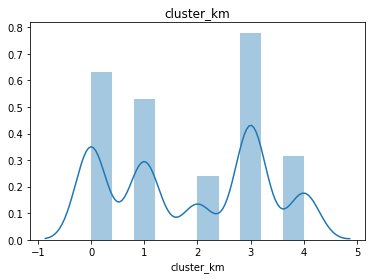

In [21]:
for feature in gym.columns:
    sns.distplot(gym[feature], bins = 10)
    plt.title(feature)
    plt.show();

<font color='Red'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Good plotting as you always do it.
</div>
<div class="alert alert-block alert-danger">
But what it talks about? We are expected by the customer to research every feauture cluster by cluster to find most significant ones for every of them. Please make bar plots for every feature by clusters. And don't forget axis names.
</div>
</font>

>Please make bar plots for every feature by clusters. 

>><div class="alert alert-info"> <b>How should I add labels to the x-axis? I'm not sure how I should do that without it being too cluttered and unreadable.</div>


<font color='Red'> 
### <u>V1 REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-danger">
<del>    
I expected you to plot graphs of such type 👇<br/>
As we can see the `Month_to_end_contract` feature differs for cluster 1 and might be considered as its distinctive feature. Please study other features in such way.
</div>
</font>

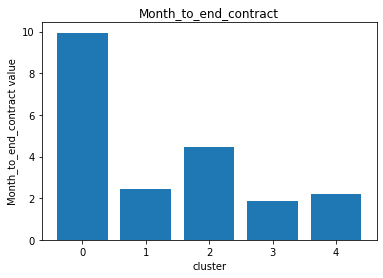

In [22]:
gym_grouped = gym.groupby(by='cluster_km').mean()
plt.bar(x=gym_grouped.index, height=gym_grouped['Month_to_end_contract'], align='center')
plt.title('Month_to_end_contract')
plt.xlabel('cluster')
plt.ylabel('Month_to_end_contract value')
plt.show();

The clusters start off with more at the start, but drops off and then increases back at n=3. 

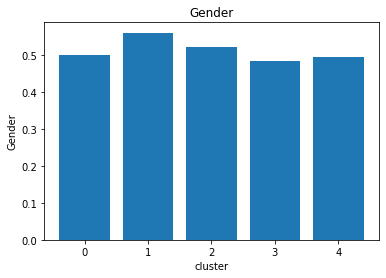

In [23]:
plt.bar(x=gym_grouped.index, height=gym_grouped['gender'], align='center')
plt.title('Gender')
plt.xlabel('cluster')
plt.ylabel('Gender')
plt.show();

Clusters 0 through 2 share about the same ratio of males to females while clusters 3 and 4 vary.

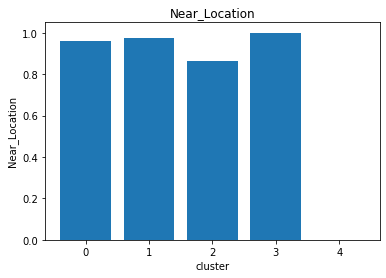

In [24]:
plt.bar(x=gym_grouped.index, height=gym_grouped['Near_Location'], align='center')
plt.title('Near_Location')
plt.xlabel('cluster')
plt.ylabel('Near_Location')
plt.show();

Clusters 0 is close to the location while the other clusters are not.

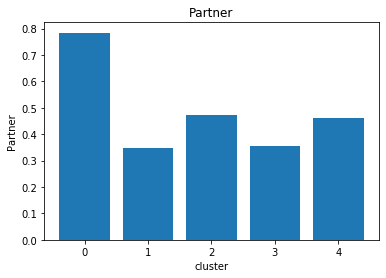

In [25]:
plt.bar(x=gym_grouped.index, height=gym_grouped['Partner'], align='center')
plt.title('Partner')
plt.xlabel('cluster')
plt.ylabel('Partner')
plt.show();

CLusters 1 and 4 have less partners while clusters 0, 2 and 3 have more partners.

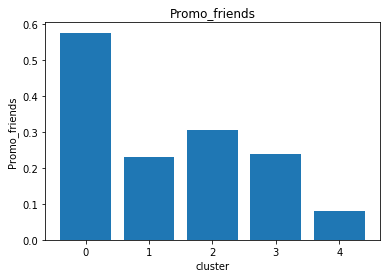

In [26]:
plt.bar(x=gym_grouped.index, height=gym_grouped['Promo_friends'], align='center')
plt.title('Promo_friends')
plt.xlabel('cluster')
plt.ylabel('Promo_friends')
plt.show();

Cluster 0 has the most promo friends while cluster 1 has the least.

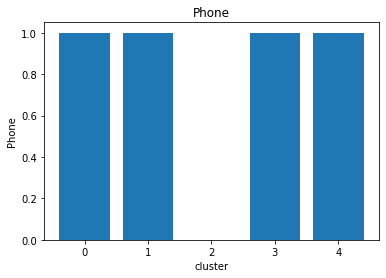

In [27]:
plt.bar(x=gym_grouped.index, height=gym_grouped['Phone'], align='center')
plt.title('Phone')
plt.xlabel('cluster')
plt.ylabel('Phone')
plt.show();

Cluster 4 does use their phones while the other clusters don't.

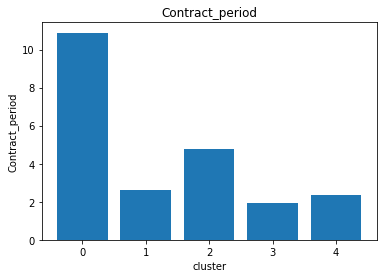

In [28]:
plt.bar(x=gym_grouped.index, height=gym_grouped['Contract_period'], align='center')
plt.title('Contract_period')
plt.xlabel('cluster')
plt.ylabel('Contract_period')
plt.show();

Cluster 1 has the longest contract period and cluster 2 has the shortest.

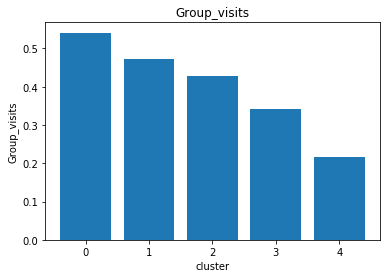

In [29]:
plt.bar(x=gym_grouped.index, height=gym_grouped['Group_visits'], align='center')
plt.title('Group_visits')
plt.xlabel('cluster')
plt.ylabel('Group_visits')
plt.show();

Cluster 1 has the most group visits, while cluster 0 has the least.

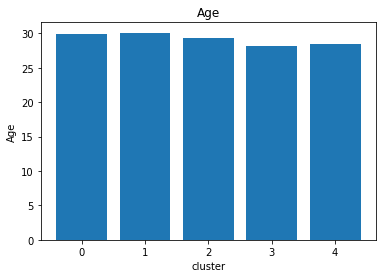

In [30]:
plt.bar(x=gym_grouped.index, height=gym_grouped['Age'], align='center')
plt.title('Age')
plt.xlabel('cluster')
plt.ylabel('Age')
plt.show();

Cluster 2 has the lowest age group, but the ages are around the same for all cluster groups.

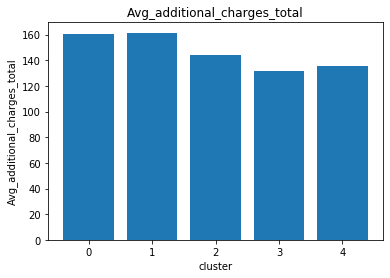

In [31]:
plt.bar(x=gym_grouped.index, height=gym_grouped['Avg_additional_charges_total'], align='center')
plt.title('Avg_additional_charges_total')
plt.xlabel('cluster')
plt.ylabel('Avg_additional_charges_total')
plt.show();

Cluster 2 has the lowest average additional charges and clusters 1 and 3 have the highest. 

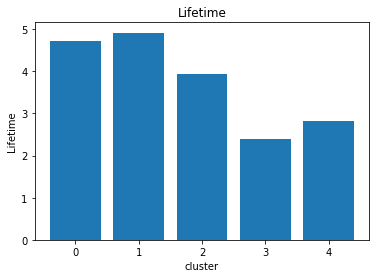

In [32]:
plt.bar(x=gym_grouped.index, height=gym_grouped['Lifetime'], align='center')
plt.title('Lifetime')
plt.xlabel('cluster')
plt.ylabel('Lifetime')
plt.show();

Cluster 3 has the highest lifetime customers while cluster 2 has the lowest.

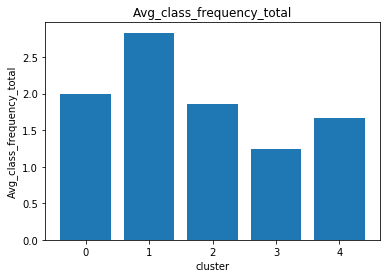

In [33]:
plt.bar(x=gym_grouped.index, height=gym_grouped['Avg_class_frequency_total'], align='center')
plt.title('Avg_class_frequency_total')
plt.xlabel('cluster')
plt.ylabel('Avg_class_frequency_total')
plt.show();

Cluster 3 has the highest average class frequency total while cluster 2 has the lowest.

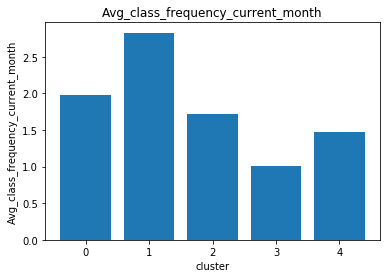

In [34]:
plt.bar(x=gym_grouped.index, height=gym_grouped['Avg_class_frequency_current_month'], align='center')
plt.title('Avg_class_frequency_current_month')
plt.xlabel('cluster')
plt.ylabel('Avg_class_frequency_current_month')
plt.show();

Cluster 3 has the highest average class frequency for the current month while cluster 2 has the lowest.

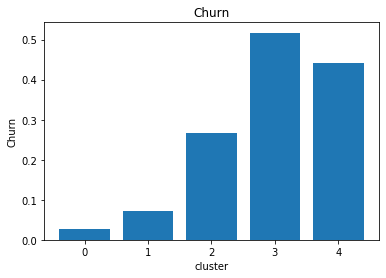

In [35]:
plt.bar(x=gym_grouped.index, height=gym_grouped['Churn'], align='center')
plt.title('Churn')
plt.xlabel('cluster')
plt.ylabel('Churn')
plt.show();

Cluster 1 has the lowest churn while cluster 2 has the highest.

<font color='grenn'> 
### <u>V2 REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Really great research about feature importance cluster by cluster. It allows the customer to understand their clients better. Good job, thank you.
</div>
</font>

### Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

In [36]:
churn = gym.groupby('cluster_km').sum().reset_index()
churn_total = churn['Churn'].sum()

churn['churn_rate'] = churn['Churn']/churn_total*100

for number in churn['churn_rate']:
    print('Churn rate: {:.2f}%'.format(number))


Churn rate: 2.64%
Churn rate: 5.75%
Churn rate: 9.71%
Churn rate: 60.79%
Churn rate: 21.11%


In [37]:
churn['churn_rate']

0     2.639020
1     5.749293
2     9.707823
3    60.791706
4    21.112158
Name: churn_rate, dtype: float64

The 2nd and 4th cluster groups have the lowest churn rate. Groups 1, 3 and 5 have higher churn rates with group 1 being the most prone to leave.

# Step 5. Come up with conclusions and basic recommendations on working with customers

*Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.*

*You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.*

#### General Conclusion:
After analyzing the data of the customer profiles provided by Model Fitness, customers that are within 1 km, 3km away and 5km away are the ones who are most likely to churn.

Target groups that should be focused and further analyzed are users who are in the groups being churned most often in order to have a clearer idea why they might be leaving more often than the other groups. A way to cut the churn rates could be to promote group visits and promo friends since they bring in more customers. 

<font color='grenn'> 
### <u>V2 REVIEWER SUMMARY</u>
<br/>
<div class="alert alert-block alert-success">
Ok, we have done it! My congratulations 👏👏👏<br/>
You demonstrated solid skills in machine learning. It is new growing fast area which brings value the customers and set the analyst more demanded. I am happy to accept the project and wish you new achievements in next learning and career. Good luck!
</div>
</font>

<font color='Red'> 
### <u>REVIEWER SUMMARY</u>
<br/>
<div class="alert alert-block alert-success">
Ok, almast well done project. You demosntrate solid knowledge and skills in data analysis. You are able to apply proper tools on demand: coding, visualization. Please pay attention to make your reports more informative, giving more markdown comments abouts findings and ideas. Customers value us not for coding (it is not more clear for them than Chinese aplphabet) but for written and plotted ideas and conclusions.
</div>
<div class="alert alert-block alert-danger">
<del>Let's make your project pretty good. Please find and fix my red comments. I am sure it will take not much time from you. See you soon here again.
</div>
</font>